In [29]:
from pyspark.sql import SparkSession
spark= SparkSession.builder.appName('Customers').getOrCreate()

In [30]:
from pyspark.ml.regression import LinearRegression

In [31]:
#Load Dataset
cust_data=spark.read.csv("Ecommerce Customers.csv",inferSchema=True,header=True)

In [32]:
cust_data

DataFrame[Email: string, Address: string, Avatar: string, Avg Session Length: double, Time on App: double, Time on Website: double, Length of Membership: double, Yearly Amount Spent: double]

In [33]:
cust_data.show()

+--------------------+--------------------+----------------+------------------+-----------+---------------+--------------------+-------------------+
|               Email|             Address|          Avatar|Avg Session Length|Time on App|Time on Website|Length of Membership|Yearly Amount Spent|
+--------------------+--------------------+----------------+------------------+-----------+---------------+--------------------+-------------------+
|mstephenson@ferna...|    835 Frank Tunnel|            null|              null|       null|           null|                null|               null|
|         Wrightmouth|      MI 82180-9605"|          Violet|       34.49726773|12.65565115|    39.57766802|         4.082620633|         587.951054|
|   hduke@hotmail.com|  4547 Archer Common|            null|              null|       null|           null|                null|               null|
|         Diazchester|      CA 06566-8576"|       DarkGreen|       31.92627203|11.10946073|    37.26895887

In [34]:
#Preprocessing the dataset
# check for null values
#cust_data.dropna().show(truncate=False)
#cust_data.na.drop().show(truncate=False)


In [35]:
cust_data.printSchema()

root
 |-- Email: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- Avatar: string (nullable = true)
 |-- Avg Session Length: double (nullable = true)
 |-- Time on App: double (nullable = true)
 |-- Time on Website: double (nullable = true)
 |-- Length of Membership: double (nullable = true)
 |-- Yearly Amount Spent: double (nullable = true)



In [52]:
#Exploring Columns
#delete null columns
cust_data.dropna().show(truncate=False)

+------------------+---------------+----------------+------------------+-----------+---------------+--------------------+-------------------+
|Email             |Address        |Avatar          |Avg Session Length|Time on App|Time on Website|Length of Membership|Yearly Amount Spent|
+------------------+---------------+----------------+------------------+-----------+---------------+--------------------+-------------------+
|Wrightmouth       | MI 82180-9605"|Violet          |34.49726773       |12.65565115|39.57766802    |4.082620633         |587.951054         |
|Diazchester       | CA 06566-8576"|DarkGreen       |31.92627203       |11.10946073|37.26895887    |2.664034182         |392.2049334        |
|Cobbborough       | DC 99414-7564"|Bisque          |33.00091476       |11.33027806|37.11059744    |4.104543202         |487.5475049        |
|Port Jason        | OH 22070-1220"|SaddleBrown     |34.30555663       |13.71751367|36.72128268    |3.120178783         |581.852344         |
|Port 

In [53]:
#The code above  d format as below.

from pyspark.sql.functions import count
from pyspark.sql.functions import when
from pyspark.sql.functions import col
cust_data.select([count(when(col(c).isNull(), c)).alias(c) for c in cust_data.columns]).show()

+-----+-------+------+------------------+-----------+---------------+--------------------+-------------------+
|Email|Address|Avatar|Avg Session Length|Time on App|Time on Website|Length of Membership|Yearly Amount Spent|
+-----+-------+------+------------------+-----------+---------------+--------------------+-------------------+
|    0|      0|   500|               500|        500|            500|                 500|                546|
+-----+-------+------+------------------+-----------+---------------+--------------------+-------------------+



In [54]:
#Next we are going to use dropna method to remove the null value from the columns.
cust_data = cust_data.dropna(how='any')

In [55]:
cust_data.select([count(when(col(c).isNull(), c)).alias(c) for c in cust_data.columns]).show()

+-----+-------+------+------------------+-----------+---------------+--------------------+-------------------+
|Email|Address|Avatar|Avg Session Length|Time on App|Time on Website|Length of Membership|Yearly Amount Spent|
+-----+-------+------+------------------+-----------+---------------+--------------------+-------------------+
|    0|      0|     0|                 0|          0|              0|                   0|                  0|
+-----+-------+------+------------------+-----------+---------------+--------------------+-------------------+



In [37]:
#sklearn

#x1,X2,X3,X4,X5    Y1 ---->model-->prediction

#[X1,X2,X3,X4,X5]  Y1---->model--->prediction

In [93]:
#To rename a column, we can use withColumnRenamed method
cust_data = cust_data.withColumnRenamed('Avg Session Length', 'Avg_Session_Length')
cust_data = cust_data.withColumnRenamed('Time on App', 'Time_on_App')
cust_data = cust_data.withColumnRenamed('Time on Website', 'Time_on_Website')
cust_data = cust_data.withColumnRenamed('Length of Membership', 'Length_of_Membership')
cust_data = cust_data.withColumnRenamed('Yearly Amount Spent', 'Yearly_Amount_Spent')
cust_data.show(5)

+---------------+---------------+----------------+------------------+-----------+---------------+--------------------+-------------------+
|          Email|        Address|          Avatar|Avg_Session_Length|Time_on_App|Time_on_Website|Length_of_Membership|Yearly_Amount_Spent|
+---------------+---------------+----------------+------------------+-----------+---------------+--------------------+-------------------+
|    Wrightmouth| MI 82180-9605"|          Violet|       34.49726773|12.65565115|    39.57766802|         4.082620633|         587.951054|
|    Diazchester| CA 06566-8576"|       DarkGreen|       31.92627203|11.10946073|    37.26895887|         2.664034182|        392.2049334|
|    Cobbborough| DC 99414-7564"|          Bisque|       33.00091476|11.33027806|    37.11059744|         4.104543202|        487.5475049|
|     Port Jason| OH 22070-1220"|     SaddleBrown|       34.30555663|13.71751367|    36.72128268|         3.120178783|         581.852344|
|Port Jacobville| PR 37242-

In [94]:
##Query Data
#filter method and this will return all the records that match the condition
cust_data.filter(cust_data["Avatar"] == "Violet").show(10)

+-----------------+---------------+------+------------------+-----------+---------------+--------------------+-------------------+
|            Email|        Address|Avatar|Avg_Session_Length|Time_on_App|Time_on_Website|Length_of_Membership|Yearly_Amount_Spent|
+-----------------+---------------+------+------------------+-----------+---------------+--------------------+-------------------+
|      Wrightmouth| MI 82180-9605"|Violet|       34.49726773|12.65565115|    39.57766802|         4.082620633|         587.951054|
|North Christopher|      RI 60962"|Violet|       33.73264839|12.13879388|    36.85388246|         1.623419609|        399.9838716|
|       Jonesshire|      GU 33532"|Violet|       33.66661568|10.98576379|    36.35250277|         0.936497597|        304.1355916|
+-----------------+---------------+------+------------------+-----------+---------------+--------------------+-------------------+



In [95]:
#Query data with > 300 as Yearly Amount Spent
cust_data.filter(cust_data["Yearly_Amount_Spent"] > 300).show(10)

+---------------+---------------+----------------+------------------+-----------+---------------+--------------------+-------------------+
|          Email|        Address|          Avatar|Avg_Session_Length|Time_on_App|Time_on_Website|Length_of_Membership|Yearly_Amount_Spent|
+---------------+---------------+----------------+------------------+-----------+---------------+--------------------+-------------------+
|    Wrightmouth| MI 82180-9605"|          Violet|       34.49726773|12.65565115|    39.57766802|         4.082620633|         587.951054|
|    Diazchester| CA 06566-8576"|       DarkGreen|       31.92627203|11.10946073|    37.26895887|         2.664034182|        392.2049334|
|    Cobbborough| DC 99414-7564"|          Bisque|       33.00091476|11.33027806|    37.11059744|         4.104543202|        487.5475049|
|     Port Jason| OH 22070-1220"|     SaddleBrown|       34.30555663|13.71751367|    36.72128268|         3.120178783|         581.852344|
|Port Jacobville| PR 37242-

In [96]:
# Descriptive statistics
##With single line of code, the describe method displays a descriptive statistic summary for each column.
cust_data.describe().show()

+-------+-----------+---------------+-----------+------------------+------------------+------------------+--------------------+-------------------+
|summary|      Email|        Address|     Avatar|Avg_Session_Length|       Time_on_App|   Time_on_Website|Length_of_Membership|Yearly_Amount_Spent|
+-------+-----------+---------------+-----------+------------------+------------------+------------------+--------------------+-------------------+
|  count|        454|            454|        454|               454|               454|               454|                 454|                454|
|   mean|       null|           null|       null| 33.05261526656388|12.041631150147582|37.052821853303996|    3.54680345731718|  499.9198577182819|
| stddev|       null|           null|       null|0.9976033532094202|0.9798699693020125|0.9978633724043364|  0.9920319137803321|  78.32579269003342|
|    min|Abigailstad|      AK 05665"|  AliceBlue|       29.53242897|       8.508152176|       34.47687763|      

In [97]:
##Data visualization
#Pie Chart
cust_cat_mean = cust_data.groupby("Avatar").agg({'Avg_Session_Length': "mean"})


In [98]:
display(cust_cat_mean)
cust_cat_mean.show()

DataFrame[Avatar: string, avg(Avg_Session_Length): double]

+--------------+-----------------------+
|        Avatar|avg(Avg_Session_Length)|
+--------------+-----------------------+
|   ForestGreen|           33.666202985|
|       DimGray|     32.152639557499995|
|      SeaGreen|     33.728089780000005|
|          Teal|      32.82890038666667|
|          Aqua|           33.111243774|
|    DodgerBlue|     31.337080936666666|
|     MintCream|     33.440740256666665|
|         Khaki|     31.840526930000003|
|     LightGray|     33.027093816666664|
|     LightBlue|           33.695299745|
|         Olive|      32.63079797333333|
|     OrangeRed|     33.031729115000005|
|LightSteelBlue|           32.035651715|
|      SeaShell|     33.950435373333335|
|       Crimson|           32.869134152|
|     BurlyWood|            32.97145076|
|       SkyBlue|      33.02944213000001|
|        Orange|          33.4709295125|
|  MediumOrchid|            33.30305462|
|     SteelBlue|            33.39060526|
+--------------+-----------------------+
only showing top

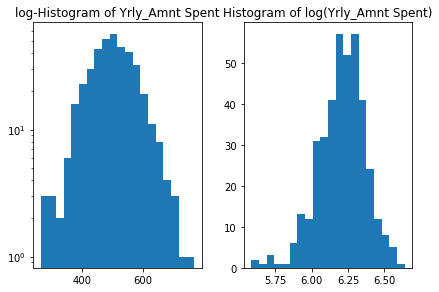

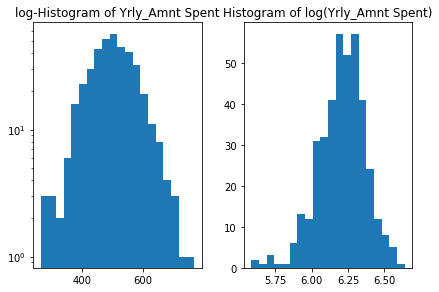

In [198]:
# histogram of Yearly_Amount_Spent
import matplotlib.pyplot as plt
from math import log
npts = 400
shares = cust_data.select('Yearly_Amount_Spent').take(npts)
yy = [float(y[0]) for y in shares]
logy = [log(y) for y in yy]
f, axes = plt.subplots(1,2)
f.tight_layout()
axes[0].hist(yy, bins=20, log=True)
axes[0].set_title('log-Histogram of Yrly_Amnt Spent')
axes[1].hist(logy, bins=20, log=False)
axes[1].set_title('Histogram of log(Yrly_Amnt Spent)')
display(f)

In [112]:
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
import seaborn as sns
import matplotlib.pyplot as plt

In [113]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [117]:
featureassembler=VectorAssembler(inputCols=["Avg_Session_Length","Time_on_App","Time_on_Website","Length_of_Membership"],
                                 outputCol="Independent_Features")

In [118]:
featureassembler.setHandleInvalid("skip").transform(cust_data).show


<bound method DataFrame.show of DataFrame[Email: string, Address: string, Avatar: string, Avg_Session_Length: double, Time_on_App: double, Time_on_Website: double, Length_of_Membership: double, Yearly_Amount_Spent: double, Independent_Features: vector]>

In [119]:
output=featureassembler.transform(cust_data)

In [120]:
output.select("Independent_Features")

DataFrame[Independent_Features: vector]

In [121]:
output.columns

['Email',
 'Address',
 'Avatar',
 'Avg_Session_Length',
 'Time_on_App',
 'Time_on_Website',
 'Length_of_Membership',
 'Yearly_Amount_Spent',
 'Independent_Features']

In [122]:
finalized_data=output.select("Independent_Features","Yearly_Amount_Spent")

In [123]:
finalized_data.show()

+--------------------+-------------------+
|Independent_Features|Yearly_Amount_Spent|
+--------------------+-------------------+
|[34.49726773,12.6...|         587.951054|
|[31.92627203,11.1...|        392.2049334|
|[33.00091476,11.3...|        487.5475049|
|[34.30555663,13.7...|         581.852344|
|[33.33067252,12.7...|         599.406092|
|[33.87103788,12.0...|        637.1024479|
|[32.0215955,11.36...|        521.5721748|
|[33.9877729,13.38...|         570.200409|
|[33.99257277,13.3...|        492.6060127|
|[29.53242897,10.9...|        408.6403511|
|[33.19033404,12.9...|        573.4158673|
|[32.38797585,13.1...|        470.4527333|
|[30.73772037,12.6...|        461.7807422|
|[32.1253869,11.73...|        457.8476959|
|[32.33889932,12.0...|        407.7045475|
|[32.18781205,14.7...|        452.3156755|
|[32.61785606,13.9...|        605.0610388|
|[32.91278511,11.3...|        534.7057438|
|[34.507551,12.893...|        700.9170916|
|[33.02933195,11.7...|        423.1799917|
+----------

In [124]:
#Splitting Dataset
train_data,test_data=finalized_data.randomSplit([0.75,0.25])

In [126]:
regressor=LinearRegression(featuresCol='Independent_Features', labelCol='Yearly_Amount_Spent')
regressor=regressor.fit(train_data)

In [127]:
regressor.coefficients

DenseVector([25.4803, 38.0527, 0.3847, 61.8461])

In [128]:
regressor.intercept

-1034.4315279744703

In [129]:
pred_results=regressor.evaluate(test_data)

In [130]:
pred_results.predictions.show(40)

+--------------------+-------------------+------------------+
|Independent_Features|Yearly_Amount_Spent|        prediction|
+--------------------+-------------------+------------------+
|[30.39318454,11.8...|        319.9288698|331.97710083094853|
|[30.57436368,11.3...|        442.0644138|443.04535659140174|
|[30.97167564,11.7...|        494.6386098| 488.7767235429217|
|[31.06621816,11.7...|        448.9332932|462.61820685111456|
|[31.12397435,12.3...|        486.9470538|508.89023708518835|
|[31.26810421,12.1...|        423.4705332|427.59930113810765|
|[31.30919264,11.9...|        432.7207178|430.12977337518646|
|[31.42522688,13.2...|        530.7667187| 534.3849602690939|
|[31.44744649,10.1...|        418.6027421| 428.0099921800854|
|[31.57020083,13.3...|        545.9454921|   563.26482637192|
|[31.6005122,12.22...|        479.1728515|461.21479459157194|
|[31.73663569,10.7...|        496.9334463|496.04484584226384|
|[31.86274111,14.0...|        556.2981412| 557.1318804059781|
|[31.874